In [ ]:
pip install tensorflow-addons[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 948.7 kB/s eta 0:00:00


In [ ]:
pip install git+https://github.com/ma7555/keras-vggface

  Cloning https://github.com/ma7555/keras-vggface to /tmp/pip-req-build-m0a1aln7
  Running command git clone --filter=blob:none --quiet https://github.com/ma7555/keras-vggface /tmp/pip-req-build-m0a1aln7
  Resolved https://github.com/ma7555/keras-vggface to commit 97a512377f9ead550a74595b657c7ec9b8161e75
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.2 MB/s eta 0:00:00
  Created wheel for keras-vggface: filename=keras_vggface-0.7-py3-none-any.whl size=8318 sha256=93916e70d8697184aef813f0f9f58b686fc8a828939d04eea8d8a4ea3b01c90e
  Stored in directory: /tmp/pip-ephem-wheel-cache-r8q5m7n7/wheels/6f/08/c9/cc4fa0605097f663fa2caa1930e7ea9f8e782e53ac98ded4d3
Successfully built keras-vggface


In [ ]:
pip show keras-vggface

Name: keras-vggface
Version: 0.7
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/ma7555/keras-vggface
Author: Refik Can MALLI & ma7555
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: h5py, keras-applications, numpy, pillow, pyyaml, scipy, six, tensorflow
Required-by: 


In [ ]:
pip install keras_applications

In [ ]:
import keras
import tensorflow as tf
import keras_vggface


print(keras_vggface.__version__)
print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


0.7
Keras version: 2.14.0
TensorFlow version: 2.14.0


In [ ]:
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import gc

In [ ]:
from keras.models import  Model
from keras.layers import Layer, Flatten, Dense, Input, Lambda
from keras_vggface.vggface import VGGFace
import keras.backend as K
from sklearn.datasets import fetch_lfw_pairs

##Data Preparation

In [ ]:
train_data = fetch_lfw_pairs(subset='train', funneled=False, resize=1.0, color=True, slice_=(slice(0, 250), slice(0, 250)))
#test_data = fetch_lfw_pairs(subset= 'test', funneled=False, resize=1.0, color=True, slice_=(slice(0, 250), slice(0, 250)))

In [ ]:

# Assuming train_data is the variable containing the LFW pairs dataset
images_train = train_data.pairs
labels_train = train_data.target

# Select an example pair
example_pair_index = 0

# Get the two images and the label for the example pair
image1_train = images_train[example_pair_index, 0]
image2_train = images_train[example_pair_index, 1]
label_train = labels_train[example_pair_index]

print("Training subset: \n")
print(image1_train.shape)
print(image2_train.shape)

print(images_train.shape)

Training subset: 

(250, 250, 3)
(250, 250, 3)
(2200, 2, 250, 250, 3)


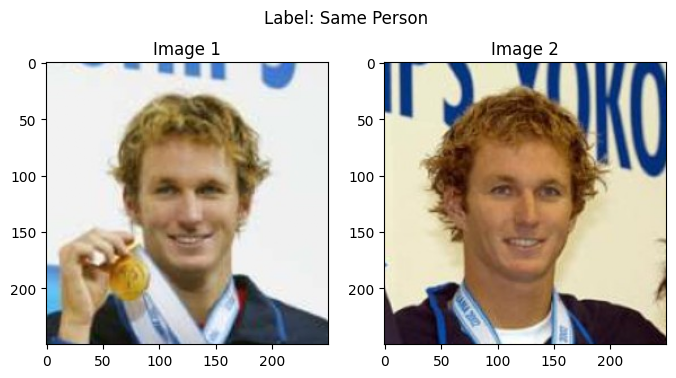

In [ ]:

# Get the two images and the label for the example pair
image1 = images_train[example_pair_index, 0]
image2 = images_train[example_pair_index, 1]
label = labels_train[example_pair_index]

# Display the images and label
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray' if len(image1.shape) == 2 else None)
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray' if len(image2.shape) == 2 else None)
plt.title('Image 2')

plt.suptitle(f"Label: {'Same Person' if label else 'Different Person'}")
plt.show()

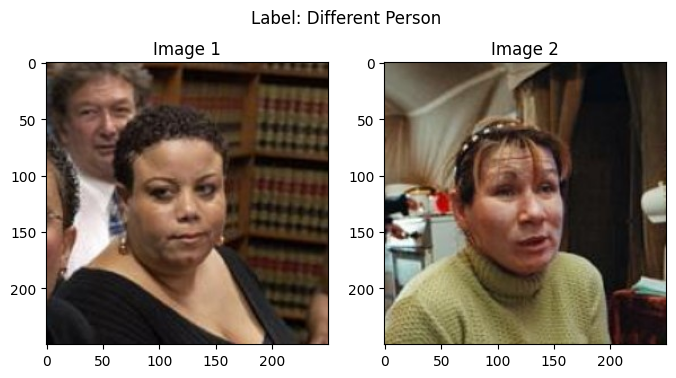

In [ ]:
# Select an example pair
example_pair_index = -1

# Get the two images and the label for the example pair
image1 = images_train[example_pair_index, 0]
image2 = images_train[example_pair_index, 1]
label = labels_train[example_pair_index]

# Display the images and label
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray' if len(image1.shape) == 2 else None)
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray' if len(image2.shape) == 2 else None)
plt.title('Image 2')

plt.suptitle(f"Label: {'Same Person' if label else 'Different Person'}")
plt.show()

In [ ]:
# Assuming images and labels are NumPy arrays
images = tf.convert_to_tensor(images_train)
labels = tf.convert_to_tensor(labels_train)

In [ ]:
images.shape

TensorShape([2200, 2, 250, 250, 3])

In [ ]:
del train_data
del images_train
del labels_train
gc.collect()

12201

In [ ]:
# Assuming 'images' is your tensor with dimensions (2200, 2, 250, 250, 3)
images_shape = images.shape

# Reshape the tensor to (2200*2, 250, 250, 3) to treat each image as a separate entity
images_reshaped = tf.reshape(images, (-1, images_shape[2], images_shape[3], images_shape[4]))

# Separate the images into two tensors
first_images = images_reshaped[::2]  # Select every other image starting from the first
second_images = images_reshaped[1::2]  # Select every other image starting from the second

# Now, 'first_images' and 'second_images' are tensors with dimensions (2200, 250, 250, 3)



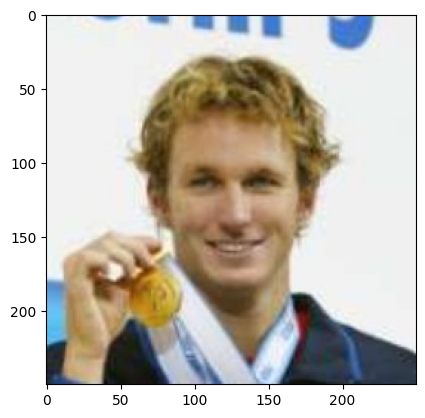

In [ ]:
plt.imshow(first_images[0].numpy())

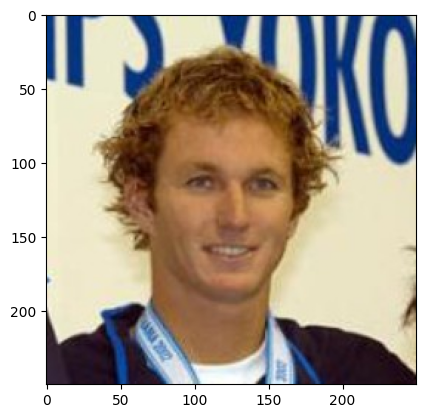

In [ ]:
plt.imshow(second_images[0].numpy())

In [ ]:
# Assuming 'first_images', 'second_images', and 'labels' are your tensors
first_images_dataset = tf.data.Dataset.from_tensor_slices(first_images)
second_images_dataset = tf.data.Dataset.from_tensor_slices(second_images)
labels_dataset = tf.data.Dataset.from_tensor_slices(labels)

# Zip the datasets
data = tf.data.Dataset.zip((first_images_dataset, second_images_dataset, labels_dataset))

In [ ]:
data

<_ZipDataset element_spec=(TensorSpec(shape=(250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
data = data.batch(16)
data = data.prefetch(8)

##Creating the embedding layer
This model is the one responsible to create a face representation for both inputs in the siamese architecture

In [ ]:
def make_embedding():
  #Getting the trained model
  vgg_model = VGGFace(include_top=False, input_shape=(250, 250, 3))

  #Freezing its layers
  for layer in vgg_model.layers:
    layer.trainable = False

  input_layer = vgg_model.get_layer(None, 0).input
  last_layer = vgg_model.get_layer('pool5').output
  x = Flatten(name='flatten')(last_layer)
  x = Dense(512, activation='relu', name='fc6')(x)
  x = Dense(128, activation='relu', name='fc7')(x)

  return Model(inputs=[input_layer], outputs=[x], name='embedding')

embedding = make_embedding()
print(embedding.summary())

58909280/58909280 [==============================] - 0s 0us/step
Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 250, 250, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 250, 250, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 125, 125, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 125, 125, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 125, 125, 128)     147584    
                                                          

##Creating the distance layer
This layer is resposible to measure the distance between two inputs

In [ ]:
class L1Dist(Layer):
  def __init__(self, **kwargs):
    super().__init__()

  def call(self, input_embedding, validation_embedding):
    return tf.math.abs(input_embedding - validation_embedding)

## Make Siamese Model

In [ ]:
def make_siamese_model():
  # Handle inputs
  input_image = Input(name='input_img', shape=(250,250,3))
  validation_image = Input(name='validation_img', shape=(250,250,3))

  # Combine siamese distance components
  siamese_layer = L1Dist()
  siamese_layer._name = 'distance'
  distances = siamese_layer(embedding(input_image), embedding(validation_image))

  # Classification Layer
  classifier = Dense(1, activation='sigmoid')(distances)

  return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

siamese_model = make_siamese_model()
print(siamese_model.summary())

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 250, 250, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 128)                  2762592   ['input_img[0][0]',           
                                                          0          'validation_img[0][0]']      
                                                                                     

##Setup Loss and Optimizer

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4)

##Establish Checkpoints

In [ ]:
checkpoint_dir = '.training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

##Build Train Step Function

In [ ]:
@tf.function
def train_step(batch):
  with tf.GradientTape() as tape:
    #Get anchor and positive/negative image
    X = batch[:2]
    #Get label
    y = batch[2]

    # Forward pass
    yhat = siamese_model(X, training=True)
    #Calculate loss
    loss = binary_cross_loss(y, yhat)

  # Calculate gradients
  grad = tape.gradient(loss, siamese_model.trainable_variables)

  # Calculate updated weights and apply to siamese model
  opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

  gc.collect()

  return loss

##Build Training Loop

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [ ]:
def convert(y_hat):
  for i in range(len(y_hat)):
    if (y_hat[i] > 0.5):
      y_hat[i] = 1.0
    else:
      y_hat[i] = 0
  return y_hat

In [ ]:
def train(data, EPOCHS):
  # Loop through epochs
  for epoch in range(1, EPOCHS+1):
    print('\n Epoch {}/{}'.format(epoch, EPOCHS))
    progbar = tf.keras.utils.Progbar(len(data))

    a = Accuracy()

    # Loop through each batch
    for idx, batch in enumerate(data):
      # Run train step here
      loss = train_step(batch)
      yhat = siamese_model.predict(batch[:2], verbose=0)
      a.update_state(batch[2], convert(yhat))
      gc.collect()
      progbar.update(idx+1)

    print(loss.numpy(), a.result().numpy())
    gc.collect()
    #Save checkpoints
    #if epoch % 10 == 0:
      #checkpoint.save(file_prefix=checkpoint_prefix)


##Train the model

In [ ]:
EPOCHS = 100

In [ ]:
train(data, EPOCHS)


 Epoch 1/100
138/138 [==============================] - 101s 581ms/step
0.46914244 0.72318184

 Epoch 2/100
138/138 [==============================] - 77s 557ms/step
0.38874468 0.5477273

 Epoch 3/100
138/138 [==============================] - 77s 560ms/step
0.26506078 0.685

 Epoch 4/100
138/138 [==============================] - 78s 562ms/step
0.20904882 0.78090906

 Epoch 5/100
138/138 [==============================] - 78s 565ms/step
0.14741568 0.8540909

 Epoch 6/100
138/138 [==============================] - 80s 580ms/step
0.12368742 0.92727274

 Epoch 7/100
138/138 [==============================] - 78s 567ms/step
0.101114765 0.97545457

 Epoch 8/100
138/138 [==============================] - 78s 562ms/step
0.06722184 0.99045455

 Epoch 9/100
138/138 [==============================] - 78s 561ms/step
0.04808475 0.9968182

 Epoch 10/100
138/138 [==============================] - 78s 564ms/step
0.037291504 0.99954545

 Epoch 11/100
138/138 [==============================] - 79s 56

##Evaluate Model

In [ ]:
siamese_model.save('siamesemodelv4.h5')